# **LangChain기초4 - Memory**

- 메모리를 사용하기 위해서는 Chain으로 엮어야 함 (LLM과 메모리 엮기)

**자주 사용되는 메모리 종류**
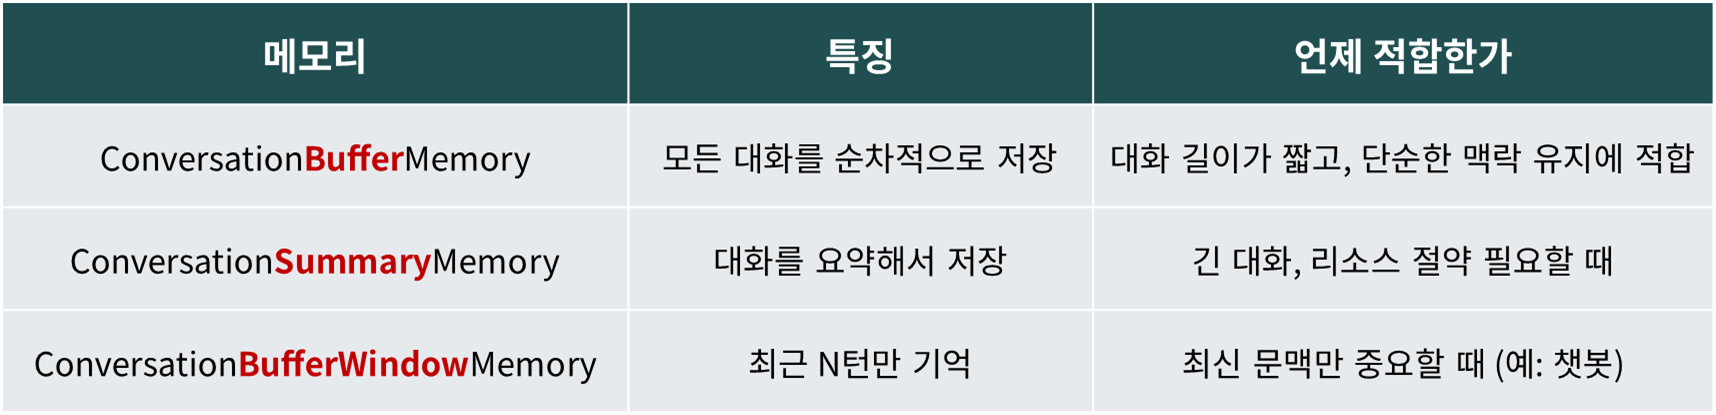

## **1.환경준비**

### (1) 구글 드라이브

#### 1) 구글 드라이브 폴더 생성
* 새 폴더(langchain)를 생성하고
* 제공 받은 파일을 업로드

#### 2) 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### (2) 라이브러리

#### 1) 필요한 라이브러리 설치

In [ ]:
!pip install langchain langchain-openai langchain_community -q

#### 2) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import os
import openai

from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain
from langchain_openai import ChatOpenAI

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### (3) OpenAI API Key 확인

In [ ]:
def load_api_keys(filepath="api_key.txt"):
    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            if line and "=" in line:
                key, value = line.split("=", 1)
                os.environ[key.strip()] = value.strip()

path = '/content/drive/MyDrive/langchain/'

# API 키 로드 및 환경변수 설정
load_api_keys(path + 'api_key.txt')

* ⚠️ 아래 코드셀은, 실행해서 key가 제대로 보이는지 확인하고 삭제하세요.

In [ ]:
print(os.environ['OPENAI_API_KEY'][:40])

## **2.Memory**

### (1) 메모리가 없을때

In [ ]:
# 메모리 없이 대화 체인 생성
llm = ChatOpenAI(model_name = 'gpt-4.1-mini' ,temperature = 0.5)

result = llm.invoke("안녕? 나는 기영이야.")
print(result.content)

In [ ]:
result = llm.invoke("내 이름이 뭐라고?")
print(result.content)

### (2) 메모리
ConversationBufferMemory

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

In [ ]:
# 메모리 포함 체인 생성
memory = ConversationBufferMemory()
chain = ConversationChain(llm = llm, memory=memory)

# 대화 시작
print(chain.run("안녕? 나는 기영이야."))

In [ ]:
print(chain.run("내 이름이 뭐라고?"))

In [ ]:
# 담긴 메모리 확인하기
memory.chat_memory.messages

### (3) 대화내용 요약

In [ ]:
from langchain.memory import ConversationSummaryMemory

# 요약 메모리 생성 (요약용 LLM 필요)
memory = ConversationSummaryMemory(llm = llm)

# 체인 구성
chain = ConversationChain(llm = llm, memory = memory)

In [ ]:
# 대화
print(chain.run("오늘은 운동하고, 친구랑 밥도 먹고, 강의도 들었어."))

In [ ]:
# 담긴 메모리 확인하기
memory.chat_memory.messages

In [ ]:
print(chain.run("내가 오늘 뭐했는지 기억나?"))

In [ ]:
print(chain.run("너는 어떻게 지냈어?"))

In [ ]:
# 담긴 메모리 확인하기
memory.chat_memory.messages

In [ ]:
# 내용 요약
print(memory.buffer)

In [ ]:
memory.load_memory_variables({})

### (4) 최근 n개만 기억
ConversationBufferWindowMemory

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

# 최근 2턴만 기억하는 메모리
memory = ConversationBufferWindowMemory(k=2)
chain = ConversationChain(llm=llm, memory=memory)

# 대화
print(chain.run("나는 기영이야."))
memory.load_memory_variables({})

In [ ]:
print(chain.run("내가 좋아하는 색은 파란색이야."))
memory.load_memory_variables({})

In [ ]:
print(chain.run("나는 영화보는 것을 좋아해"))
memory.load_memory_variables({})

In [ ]:
print(chain.run("지금 배고픈데 뭘 먹을까?"))
memory.load_memory_variables({})

In [ ]:
print(chain.run("내가 누구라고?"))
memory.load_memory_variables({})

### (5) 반복문 안에서 질문답변 이어가기

In [ ]:
# 요약 메모리 생성 (요약용 LLM 필요)
memory = ConversationSummaryMemory(llm = llm)

# 체인 구성
chain = ConversationChain(llm = llm, memory = memory)

In [ ]:
while True:
    query = input('질문 > ')
    query = query.strip()
    print(f'질문 : {query}')
    print('-' * 20)
    if len(query) == 0:
        break
    result = chain.run(query)
    print(f'답변 : {result}')
    print('=' * 50)

### (6) 😀실습

* 실습1 : ConversationSummaryMemory
    * 오늘 하루 동안 한 일을 여러 문장으로 말하고
    * 이어서 "오늘 내가 뭐했지?"라고 질문하세요.
    * 요약된 대화를 통해 LLM이 잘 정리해서 응답하는지 확인하세요.

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationSummaryMemory



* 실습2 : ConversationBufferWindowMemory
    * k = 2로 설정하고,
    * 좋아하는 영화, 좋아하는 음악, 좋아하는 책 등 여러 대화를 한 다음
    * 첫번째 나눈대화에 대해서 질문하기

In [ ]:
from langchain.memory import ConversationBufferWindowMemory


